# **Lab 4: Integration**
**Christian Weigelt**

#***About the code*** 

In [1]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2023 Christian Weigelt (weigelt@kth.se)

# This file is part of the course DD2363 DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Abstract**

This lab consisted of implementing a set of quadratures.
  
  Test code was written to verify function outputs.
  
  In the introduction section, the function is given a brief description, both of input/output, and what is to be tested.
  
  In the method section, short definitions of the functions are given, and their respective implementation and test function is presented.
  
  In the results section, the output of the test cases are presented.

# **Set up environment**

In [2]:
import numpy as np
from numpy import random as rng
import math
from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes

# **Introduction**

In this lab, the assignment was to implement four functions, with input and output as defined in the lab instructions, as well as write code tests to test output.
  
1. Function: 2-point Gauss quadrature over a unit interval 

  Input: function $f(x)$ 

  Output: quadrature approximation of integral $\int_0^1 f(x) dx$
  
  Test: verify exact integration of cubic polynomials $ax^3 + bx^2 + cx + d$

2. Function: 3-point edge midpoint quadrature over a reference triangle

  Input: function $f(x)$
  
  Output: quadrature approximation of integral $\int_{ref-triangle} f(x) dx$
  
  Test: verify exact integration of quadratic polynomials $ax^2 + by^2 + cxy + dx + ey + f$

3. Function: Monte Carlo quadrature over a unit interval
  
  Output: MC quadrature approximation of integral $\int_0^1 f(x) dx$

  Test: verify convergence rate $1/sqrt(n)$ with respect to number of quadrature points n.

4. Function: Monte Carlo quadrature over a reference triangle

  Input: function $f(x)$
  
  Output: MC quadrature approximation of  integral $\int_{ref-triangle} f(x) dx$
  
  Test: verify convergence rate $1/sqrt(n)$ with respect to number of quadrature points n

# **Method**

Here the code for the assignment is provided.

###2-point Gauss quadrature over a unit interval
  Function 1 is '2-point Gauss quadrature over a unit interval'.

  2-point gauss is exact for cubic polynomials

  We have 2-point Gauss formula for interval [-1, 1]:
  $\int_{-1}^{1}f(x)dx\approx∑_{i=0}^{1}w_if(x_i)$
  
  For interval $[a, b]$, we have instead:
  $\int_{a}^{b}f(x)dx\approx \frac{b - a}{2} ∑_{i=0}^{1}w_if(\frac{b - a}{2}x_i + \frac{a + b}{2})$

  For $[a, b] = [0, 1]$ and $w_0 = w_1 = 1, x_0 = - \frac{1}{\sqrt 3}, x_1 = \frac{1}{\sqrt 3}$, we have: 
  
  $\int_{0}^{1}f(x)dx\approx \frac{1}{2} \bigg[ f(-\frac{1}{2\sqrt{3}} + \frac{1}{2}) + f(\frac{1}{2\sqrt{3}} + \frac{1}{2})\bigg]$

  To test, we will compare the approximation to exact solution for cubic polynomial $p(x) = c_3x^3 + c_2x^2 + c_1x + c_0$:

  $∫_{0}^{1}p(x)dx = \bigg[\frac{c_3 x^4} 4 + \frac{c_2 x^3} 3 + \frac{c_1 x^2} 2 + c_0 x \bigg]_0^1 
  = \frac{c_3} 4 + \frac{c_2} 3 + \frac{c_1} 2 + c_0$

In [3]:
def gauss_quad2_ab(f, a, b):
  # f(x)
  # 2-point over interval [a, b]
  return ((b-a)/2) * (f(((b-a)/2)*(-1/math.sqrt(3)) + ((a + b)/2)) + f(((b-a)/2)*(1/math.sqrt(3)) + ((a + b)/2)) )

def gauss_quad2_unit(f):
  # f(x)
  # 2-point over interval [0, 1]
  return gauss_quad2_ab(f, 0, 1)


To test the above code, we can run the following test function:

In [138]:
def test_gauss_quad2_unit():
  print("Testing 2-point Gauss quadrature over unit interval")
  # run 
  c = rng.rand(4)
  f = lambda x: c[3]*x**3 + c[2]*x**2 + c[1]*x + c[0]
  test = gauss_quad2_unit(f)
  exact_solution = c[3]*(1/4) + c[2]*(1/3) + c[1]*(1/2) + c[0]
  # compare
  error = abs(exact_solution - test)
  print(f"\terror: {error}")
  assert np.isclose(error, 0.) == True, f"gauss_quad inaccurate"

###3-point edge midpoint quadrature over a reference triangle
  Function 2 is '3-point edge midpoint quadrature over a reference triangle'

  Reference triangle: $△_r(a, b, c) = △_r((0,0), (1, 0), (0, 1))$

  3-point edge midpoint quadrature rule for the reference triangle, with the weights $w_0 = w_1 = w_2 = \frac{1}{6}$ is exact for quadratic polynomials.

  Midpoints: $x_i = (a + (b-a)/2), (a + (c-a)/2), (b + (c - b)/2)$

  Reference triangle midpoints $x_i = (\frac1 2, 0), (0, \frac1 2), (\frac1 2, \frac1 2)$

  We then have the quadrature formula:

  $\int_{△_r} f(x, y) dydx ≈ ∑_{i=0}^{2}w_if(x_i, y_i)$

  Use $w_0 = w_1 = w_2 = \frac{1}{6}$ and reference triangle ($△_r$) $x_i = (\frac1 2, 0), (0, \frac1 2), (\frac1 2, \frac1 2)$

  $\int_{△_r} f(x, y) dydx ≈ \frac{1}{6}\bigg[f(\frac1 2, 0) + f(0, \frac1 2) + f(\frac1 2, \frac1 2) \bigg]$

  To test, we will compare the approximation to exact solution for quadratic polynomial $q(x_0, x_1) = c_5x_0^2  + c_4x_1^2 + c_3x_0x_1 + c_2x_0 + c_1x_1 + c_0$:

  $∫_{△_r}q(x, y)dydx = \frac1 {12}c_5 + \frac1 {12}c_4 + \frac1 {24}c_3 + \frac1 6c_2 + \frac1 6c_1 + \frac1 2c_0 = \frac1 {24}\bigg( 2c_5 + 2c_4 + c_3 + 4c_2 + 4c_1 + 12c_0 \bigg)$


In [5]:
def edge_midpoint_quad(f):
  # f(x, y)
  # 3-point edge midpoint over reference triangle [(0, 0), (1, 0), (0, 1)]
  return (1/6) * (f(1/2, 0) + f(0, 1/2) + f(1/2, 1/2))

To test the above code, we can run the following test function:

In [137]:
def test_edge_midpoint_quad():
  print("Testing 3-edge midpoint Gauss quadrature over reference triangle")
  c = rng.rand(6) # coefficients
  f = lambda x, y: c[5]*x**2 + c[4]*y**2 + c[3]*x*y + c[2]*x + c[1]*y + c[0]
  test = edge_midpoint_quad(f)
  exact_solution = (1/24) * (2*c[5] + 2*c[4] + c[3] + 4*c[2] + 4*c[1] + 12*c[0])
  # compare
  error = abs(exact_solution - test)
  print(f"\terror: {error}")
  assert np.isclose(error, 0.) == True, f"edge_midpoint inaccurate"

### Monte Carlo quadrature over a unit interval
  Function 3 is ' Monte Carlo quadrature over a unit interval'

  The Monte Carlo quadrature, unlike the above quadratures, is a stochastic method.

  To approximate $\int_D g(x)dx$, we use $n$ random sample points in the interval $D = [a, b]$, and the weight function $w_i = \frac{|D|}{n}$. Following is the general form of Monte Carl quadrature (from 12.3):

  $\int_Dg (x)dx \approx \frac{|D|}{n}∑_{i=1}^{n}g(x_i) = \frac{1}{n}∑_{i=1}^{n}g(x_i)|D|$

  For $D = [a, b]$ we have:
  $\int_a^bg(x)dx \approx \frac{1}{n}∑_{i=1}^{n}g(x_i)|b - a|$

In [124]:
def monte_carlo_quad_1d(g, a, b, n):
  w_d = abs(b - a)
  w_n = 1/n
  mean = 0
  for i in range(n):
    x = rng.uniform(a, b)
    mean += g(x) * w_d
  return mean * w_n

To test the above code, we can run the following test function:

In [133]:
def test_monte_carlo_1d():
  print("Testing Monte Carlo quadrature over unit interval")
  # init x_axis
  x_axis = [i for i in range(1, 101)]
  
  # define polynomial function f
  f = lambda x: np.sin(x)**2 - np.cos(x)
  # Exact solution for integral of f(x) over [0, 1]
  # F(x) = (1/2) * (x - (2 + cos(x))*sin(x))
  exact = (1/2) * (1 - (2 + np.cos(1))*np.sin(1))
  
  # init errors
  errors = []
  
  for n in x_axis:
    avg_error = 0
    # n = 1 to 100 points
    # for each n, take average error for m = 20 tests
    m = 20
    for i in range(m):
      res_quad = monte_carlo_quad_1d(f, 0, 1, n)
      avg_error += abs(exact - res_quad)
    errors.append(avg_error/m)

  # expected convergence = initial error * 1/sqrt(x)
  exp_conv = [errors[0]/np.sqrt(x) for x in x_axis]

  print(f"n = 1 to 100 sample points, average of {m} trials at each n")
  #plot avg_errors
  plt.title("Plot of average errors of monte carlo quadrature")
  plt.yscale("log")
  plt.plot(x_axis, errors)
  plt.plot(x_axis, exp_conv)
  plt.gca().legend(("average error", "expected convergence rate"))
  plt.ylabel("avg_error")
  plt.yticks([0.01, 0.1, 1])
  plt.xlabel("# of sample points")
  
  plt.show()

### Monte Carlo quadrature over a reference triangle
  Function 4 is 'Monte Carlo quadrature over a reference triangle'

  Here, the domain $D$ is an area, and $|D|$ is the area of that triangle.

  Again, we use the same form as the above function:
  
  $\int_Dg (x, y)dydx \approx \frac{|D|}{n}∑_{i=1}^{n}g(x_i, y_i) = \frac{1}{n}∑_{i=1}^{n}g(x_i, y_i)|D|$

  For $D = △_r$ we have:

  $ \int_{△_r}g(x, y)dydx\approx \frac{1}{n}∑_{i=1}^{n}g(x_i, y_i) area (△_r)$

  To solve this, we implement a couple of helper functions to calculate the area of the triangle, and to generate random sample points in the triangle.

In [128]:
def tri_area(a, b, c):
  return abs((0.5)*(a[0]*(b[1]-c[1])+b[0]*(c[1]-a[1])+c[0]*(a[1]-b[1])))

def tri_rand_point(a, b, c):
  p = rng.random((2))
  d = abs(p[0] - p[1])
  s, t, u = d, 0.5 * (p[0] + p[1] - d), 1 - 0.5*(d + p[0] + p[1])
  return s * a[0] + t * b[0] + u * c[0], s * a[1] + t * b[1] + u * c[1]
  
def monte_carlo_quad_tri(g, a, b, c, n):
  w_d = tri_area(a, b, c)
  w_n = 1/n
  mean = 0
  for i in range(n):
    p = tri_rand_point(a, b, c)
    mean += g(p[0], p[1]) * w_d
  return mean * w_n

To test the above code, we can run the following test function:

In [145]:
def test_monte_carlo_tri():
  print("Testing Monte Carlo quadrature over reference triangle")
  # init x_axis
  x_axis = [i for i in range(1, 101)]
  # reference triangle [a, b, c] = [[0, 0], [1, 0], [0, 1]]
  a, b, c = [0, 0], [1, 0], [0, 1]
  
  # define polynomial function f
  f = lambda x, y: np.sin(x)**2 - np.cos(y)
  # Exact solution for integral of f(x) over reference triangle
  exact = (1/8) * (-7 + 8*np.cos(1) + np.cos(2))
  
  # init errors
  errors = []
  
  for n in x_axis:
    avg_error = 0
    # n = 1 to 100 points
    # for each n, take average error for m = 20 tests
    m = 20
    for i in range(m):
      res_quad = monte_carlo_quad_tri(f, a, b, c, n)
      avg_error += abs(exact - res_quad)
    errors.append(avg_error/m)

  # expected convergence = initial error * 1/sqrt(x)
  exp_conv = [errors[0]/np.sqrt(x) for x in x_axis]

  print(f"n = 1 to 100 sample points, average of {m} trials at each n")
  #plot avg_errors
  plt.title("Plot of average errors of monte carlo quadrature over ref-triangle")
  plt.yscale("log")
  plt.plot(x_axis, errors)
  plt.plot(x_axis, exp_conv)
  plt.gca().legend(("average error", "expected convergence rate"))
  plt.ylabel("avg_error")
  plt.yticks([0.01, 0.1])
  plt.xlabel("# of sample points")
  
  plt.show()

# **Results**

Running the test cases here in google colab, after importing required libraries, defining all functions, etc., generates the following output:

In [143]:
test_gauss_quad2_unit()
test_edge_midpoint_quad()

Testing 2-point Gauss quadrature over unit interval
	error: 0.0
Testing 3-edge midpoint Gauss quadrature over reference triangle
	error: 0.0


The Gauss quadrature generate accurate approximations of the input functions, as shown above.

Next, the stochastic Monte Carlo quadrature, over a unit interval and a reference triangle:

Testing Monte Carlo quadrature over unit interval
n = 1 to 100 sample points, average of 20 trials at each n


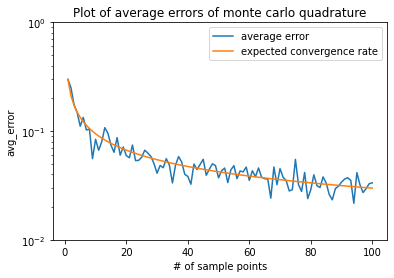

Testing Monte Carlo quadrature over reference triangle
n = 1 to 100 sample points, average of 20 trials at each n


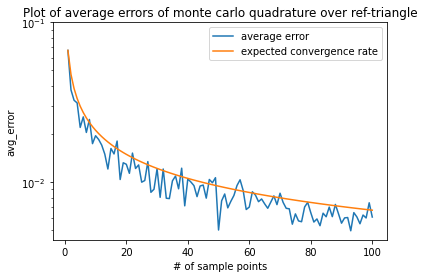

In [146]:
test_monte_carlo_1d()
test_monte_carlo_tri()

Here we can see the average error in blue, from 10 trials at every number of sample points n, compared to the expected rate of converge for the error in orange, being the initial error multiplied by the expected convergence rate:

$μ = {avg\_error}_0 * \frac{1}{\sqrt n}$

The quadrature seems to have the expected rate of convergence.

# **Discussion**

The quadratures seem like good ways to approximate integrals. The functions were not too difficult to implement, so I decided to make some of them for general intervals, translating from the base case to a unit interval in the first function, and using general intervals for the Monte Carlo implementations.

For the Monte Carlo quadratures, I did not get good results at first, with the error being very irregular, especially at low amounts of sample points. Taking an average of around 20 quadratures should show the convergence better. Also, I wasn't sure of exactly how to best compare the error to the expected convergence rate, but starting at the initial error seemed like the best starting point.